In [264]:
import random

def generate_set_cover_instance(universe_size, subset_count, max_subset_size):
    universe = [random.randint(1,1000) for i in range(universe_size)]
    subsets = []

    for _ in range(subset_count):
        subset_size = min(random.randint(1, min(max_subset_size, len(universe))), len(universe))
        subset = random.sample(universe, subset_size)
        subsets.append(set(subset))

    return universe, subsets

# Example usage:
universe_size = 20
subset_count = 8
max_subset_size = 5

universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

print("Universe:", universe)
print("Subsets:", subsets)


Universe: [603, 950, 730, 809, 829, 279, 27, 542, 632, 533, 28, 885, 120, 146, 55, 219, 522, 14, 556, 606]
Subsets: [{556, 146, 533, 120, 542}, {533}, {522, 55}, {809, 55, 632, 603, 542}, {14, 55, 219, 829, 542}, {950, 542}, {120, 219, 542}, {730}]


In [265]:
import random

def set_cover_algo(universe, subsets):
    all_arrays = []

    while set().union(*map(set, all_arrays)) != set(universe):
        remaining_elements = set(universe) - set().union(*map(set, all_arrays))
        feasible_subsets = [s for s in subsets if any(el in remaining_elements for el in s)]

        if not feasible_subsets:
            break

        selected_subset = max(feasible_subsets, key=lambda s: sum(s) * len(set(s) - set().union(*map(set, all_arrays))))
        all_arrays.append(selected_subset)

    return all_arrays

# Example usage:
universe = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
subsets = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9, 10}]

result = set_cover_algo(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [{8, 9, 10, 7}, {4, 5, 6}, {1, 2, 3}]


In [266]:
def set_cover_greedy(universe, subsets):
    elements = set(universe)
    selected_subsets = []
    iteration = 0
    total_len = len(elements)
    count = 0
    while elements:
      if count > 10:
        break
      # Choose the subset that covers the maximum number of uncovered elements
      best_subset = max(subsets, key=lambda s: len(set(s) & elements))

      # Add the chosen subset to the selected subsets
      selected_subsets.append(best_subset)

      # Update the set of uncovered elements
      elements -= set(best_subset)

      if len(elements) >= total_len:
        count += 1
      else:
        total_len = len(elements)

    return selected_subsets

# Example usage:
universe = {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
subsets = [{1, 2, 3}, {4, 5, 6}, {7, 8, 9, 10}]

result = set_cover_greedy(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [{8, 9, 10, 7}, {1, 2, 3}, {4, 5, 6}]


In [267]:
def set_cover_approx(universe, subsets):
    all_arrays = set_cover_greedy(universe, subsets)
    flattened_list = [item for sublist in all_arrays for item in sublist]

    while set(flattened_list) != set(universe):
        remaining_elements = set(universe) - set(flattened_list)
        feasible_subsets = [s for s in subsets if any(el in remaining_elements for el in s)]

        if not feasible_subsets:
            break

        selected_subset = max(feasible_subsets, key=lambda s: len(set(s) & remaining_elements))
        all_arrays.append(selected_subset)
        flattened_list = [item for sublist in all_arrays for item in sublist]

    return all_arrays

In [268]:
# Example usage:
universe_size = 15
subset_count = 1000
max_subset_size = 10

universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)

result = set_cover_algo(universe, subsets)
print("Sorted Subsets:", result)

result2 = set_cover_greedy(universe, subsets)
print("Sorted Subsets:", result2)


Sorted Subsets: [{640, 833, 257, 224, 900, 548, 672, 238, 467, 469}, {160, 640, 833, 32, 548, 900, 207, 143, 467, 469}, {672, 160, 833, 640, 900, 548, 6, 143, 467, 469}]
Sorted Subsets: [{32, 160, 672, 833, 548, 6, 238, 143, 467, 469}, {32, 224, 160, 672, 640, 900, 6, 257, 207, 469}]


In [274]:
import time
import matplotlib.pyplot as plt
import numpy as np

sizes = []
greedy_algo_times = []
max_algo_times = []
approx_times = []
results_greedy = []
results_max_algo = []
results_approx_ = []
for _ in range(2,300):
    # Example usage:
    universe_size = random.randint(10,1000)
    subset_count = random.randint(10,100)
    max_subset_size = random.randint(2,100)



    universe, subsets = generate_set_cover_instance(universe_size, subset_count, max_subset_size)
    evalVal = [item for sublist in subsets for item in sublist]

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = set_cover_algo(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = set_cover_approx(universe, subsets)
    approx_time = time.time() - start_time

    print(len(result1),len(result2),len(result3),len(subsets))
    results_greedy.append(len(result1))
    results_max_algo.append(len(result2))
    results_approx_.append(len(result3))
    set_values = [set(subset) for subset in result1]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result2]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    set_values = [set(subset) for subset in result3]  # Replace result1 with your actual variable
    intersection1 = set().union(*set_values) & set(evalVal)
    intersection2 = set().union(*set_values) & set(universe)
    equal_ratio = len(intersection1) / len(intersection2)
    print(equal_ratio)

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    max_algo_times.append(maxVal_time)
    approx_times.append(approx_time)


57 46 57 75
1.0
1.0
1.0
45 35 45 44
1.0
1.0
1.0
3 3 3 42
1.0
1.0
1.0
8 9 8 97
1.0
1.0
1.0
44 33 44 82
1.0
1.0
1.0
23 12 23 12
1.0
1.0
1.0
46 37 46 98
1.0
1.0
1.0
7 7 7 90
1.0
1.0
1.0
34 23 34 25
1.0
1.0
1.0
27 17 27 20
1.0
1.0
1.0
49 42 49 77
1.0
1.0
1.0
46 34 46 97
1.0
1.0
1.0
4 4 4 35
1.0
1.0
1.0
18 20 18 56
1.0
1.0
1.0
31 20 31 22
1.0
1.0
1.0
19 20 19 90
1.0
1.0
1.0
3 4 3 34
1.0
1.0
1.0
49 38 49 79
1.0
1.0
1.0
1 1 1 74
1.0
1.0
1.0
25 14 25 14
1.0
1.0
1.0
2 2 2 75
1.0
1.0
1.0
72 61 72 88
1.0
1.0
1.0
28 17 28 65
1.0
1.0
1.0
46 36 46 74
1.0
1.0
1.0
56 47 56 62
1.0
1.0
1.0
37 27 37 36
1.0
1.0
1.0
30 19 30 23
1.0
1.0
1.0
29 18 29 19
1.0
1.0
1.0
1 1 1 53
1.0
1.0
1.0
54 43 54 54
1.0
1.0
1.0
7 7 7 63
1.0
1.0
1.0
38 27 38 36
1.0
1.0
1.0
12 10 12 86
1.0
1.0
1.0
35 24 35 29
1.0
1.0
1.0
49 39 49 55
1.0
1.0
1.0
34 23 34 25
1.0
1.0
1.0
1 1 1 57
1.0
1.0
1.0
22 11 22 11
1.0
1.0
1.0
6 7 6 48
1.0
1.0
1.0
64 53 64 63
1.0
1.0
1.0
78 69 78 100
1.0
1.0
1.0
35 27 35 54
1.0
1.0
1.0
4 4 4 66
1.0
1.0
1.0
42 

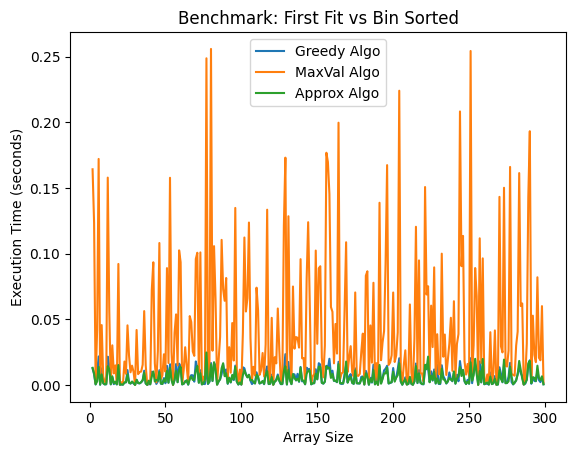

In [275]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_times, label='Greedy Algo')
plt.plot(sizes, max_algo_times, label='MaxVal Algo')
plt.plot(sizes, approx_times, label='Approx Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

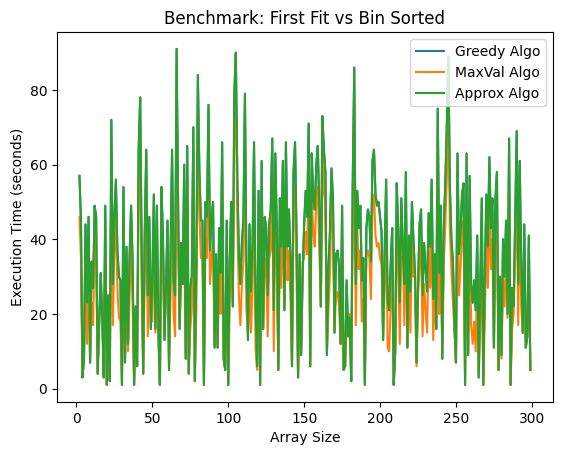

In [276]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, results_greedy, label='Greedy Algo')
plt.plot(sizes, results_max_algo, label='MaxVal Algo')
plt.plot(sizes, results_approx_, label='Approx Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()